# Simulation analysis of different smoothness measures applied on reconstructed movement data

This notebook contains the code to generate simulated reconstructed movements to evaluate the performance of the different smoothness measures. You must ensure that you have executed the notebook "GenerateMJTForVirtualIMU.ipynb" to generate the simulated movements before this notebook.

**Note**: To execute this code change the variable "basedrive" to the correct folder addresss.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import json
import glob
import sys
import pandas as pd
import os

basedrive = "drive/My Drive/0_projects/IMU-Smoothness"
os.chdir(basedrive)
sys.path.append("scripts")

In [3]:
import imupaper.reconstructedanalysis as ra
import myrobotics as myrob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from matplotlib.backends.backend_pdf import PdfPages
import os
import time
import progressbar as pb
import seaborn as sb

In [0]:
plt.rcParams['svg.fonttype'] = 'none'

## Generate Virutal IMU data and save reconstructed trajectory plots

This can be generated by running the scripts genreconstmoves.py and genreconsttraj.py in the scripts folder.

In [0]:
# Write the params file
ra.Params.write_params_file()

# Generate and save data
ra.generate_save_reconstructed_data(ra.Params, offset=False)

[Elapsed Time: 1:52:38] |####################################| (ETA:  00:00:00)

In [0]:
# Generate summary plots of reconstructed movement trajectories
ra.generate_reconst_traj(ra.Params)

[Elapsed Time: 0:06:37] |####################################| (ETA:  00:00:00)

## Generate Smoothness Performance Summary

In [0]:
velRecon = ra.get_smoothness_perf(ra.Params)
summ_fname = "{0}/smooth_perf_summary.csv".format(ra.Params.outdir)
velRecon.to_csv(path_or_buf=summ_fname, index=True, header=True)

[Elapsed Time: 0:14:06] |####################################| (ETA:  00:00:00)

## Smoothness Performance Summary Plots - Smoothness Values

In [0]:
summ_fname = "{0}/smooth_perf_summary.csv".format(ra.Params.outdir)
velRecon = pd.read_csv(filepath_or_buffer=summ_fname, index_col=0)

In [0]:
# Smoothnes summary plots.
ra.generate_smoothness_summary_plots(velRecon, ra.Params)

Smoothness summary ... Done 
Smoothness LDLJ factors summary ... Done 
Relative smoothness error summary ... Done 
Relative smoothness error (different SGR) summary ... Done 
Relative smoothness error comparisons ... Done 
Relative smoothness error comparisons (different SGR) ... Done 


In [0]:
# Smoothness scatter plots
ra.generate_smoothness_scatter_plots(velRecon, ra.Params)

data/reconstructed//summary/smoothscatter/smooth_scatter.pdf... Done!
data/reconstructed//summary/smoothscatter/smootherr_vs_sgr.pdf... Done!
data/reconstructed//summary/smoothscatter/smootherr_vs_angrange.pdf... Done!
data/reconstructed//summary/smoothscatter/smootherr_vs_angvelmax.pdf... Done!
data/reconstructed//summary/smoothscatter/smooth_scatter_above_sgr.pdf... Done!
data/reconstructed//summary/smoothscatter/smooth_scatter_diff_sgr.pdf... Done!


## Scatter plot of different smoothness measures.

The true and estimated smoothness values for the different movements are shown in these plots. The yellow colored points are the ones whose signal-to-gravity (SGR) ratio greater than 1.05.


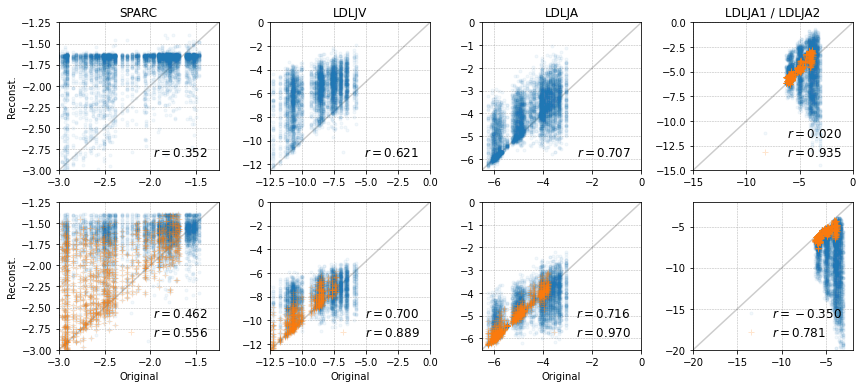

In [0]:
fig = ra.generate_smooth_compare_scatter_for_paper(velRecon, lims=[[-3, -1.25], [-12.5, 0.0], [-6.5, 0.0], [-15, 0], [-20, -2]], sgrth=1.05);
fig.savefig(fname="data/reconstructed/summary/compare.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/compare.png", format="png", dpi=300)

## Plot of correlations for different levels of errors

The following plot shows the correlation between the true and estimate smoothnessusing different smoothness measures. We seen that awith increasing duration, and increasing reconstruction error, the correlation becomes worse.

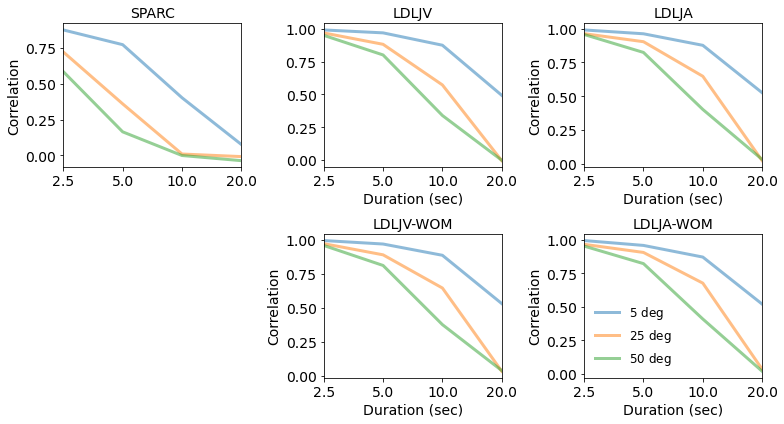

In [0]:
fig = ra.gen_correlation_summary(velRecon)
fig.savefig(fname="data/reconstructed/summary/corr_summ.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/corr_summ.png", format="png", dpi=300)

## Smoothnes analysis summary with SGR

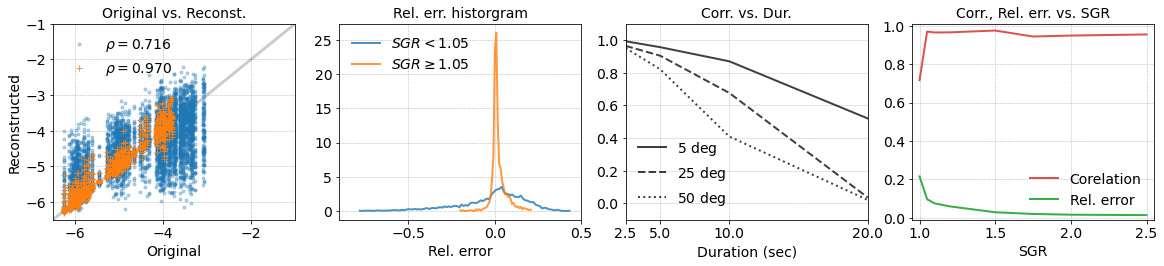

In [0]:
fig = ra.gen_summary_for_ldlja(velRecon, sgrth=1.05, col1="ldlja", col2="ldljra-wom", lims=[-6.5, -1])
fig.savefig(fname="data/reconstructed/summary/ldlja-wom-summary.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-wom-summary.png", format="png", dpi=300)

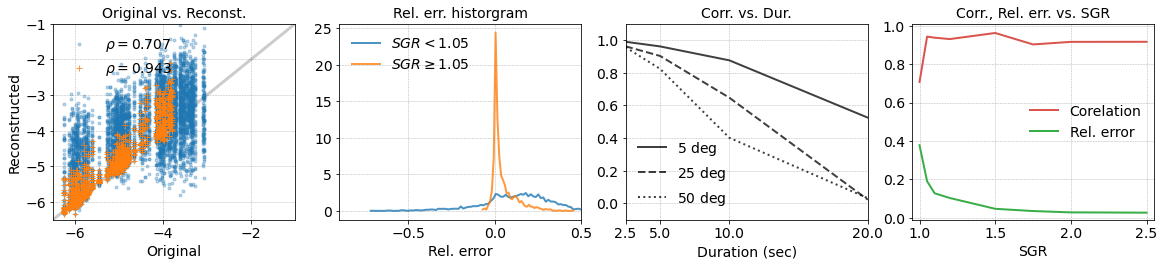

In [0]:
fig = ra.gen_summary_for_ldlja(velRecon, sgrth=1.05, col1="ldlja", col2="ldljra", lims=[-6.5, -1])
fig.savefig(fname="data/reconstructed/summary/ldlja-summary.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-summary.png", format="png", dpi=300)

## Effect for chopping on smoothness analysis

In [0]:
velRecon_chop = ra.get_smoothness_perf_with_chopping(ra.Params, choparam=[0, 1, 5, 10])
summ_fname = "{0}/chopped_ldlja_smooth_perf_summary.csv".format(ra.Params.outdir)
velRecon.to_csv(path_or_buf=summ_fname, index=True, header=True)

[Elapsed Time: 0:10:14] |################################### | (ETA:   0:00:00)

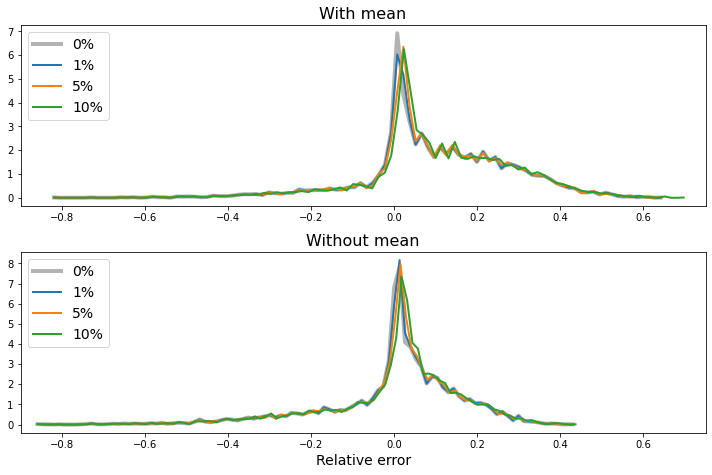

In [0]:
summ_fname = "{0}/chopped_ldlja_smooth_perf_summary.csv".format(ra.Params.outdir)
velRecon_chop  = pd.read_csv(filepath_or_buffer=summ_fname, index_col=0)
ra.plot_ldlja_chopping_summary(velRecon_chop);

### Comparison of the different terms of the LDLJA measures for the simulated movements.

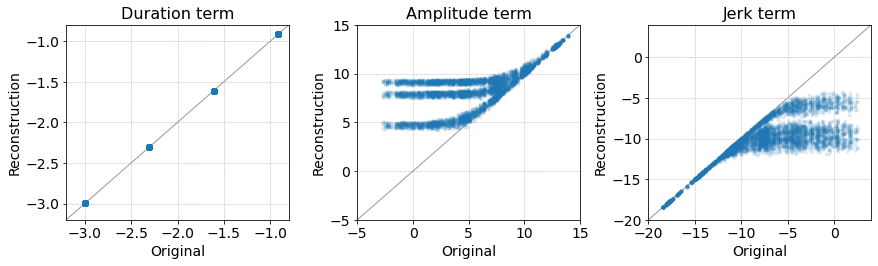

In [0]:
fig = ra.compare_ldlja_terms(velRecon);
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms.png", format="png", dpi=300)
# Comment the following line to see the figure.
# plt.close()

### Comparison of the different terms of the LDLJA measures for the simulated movements for different durations

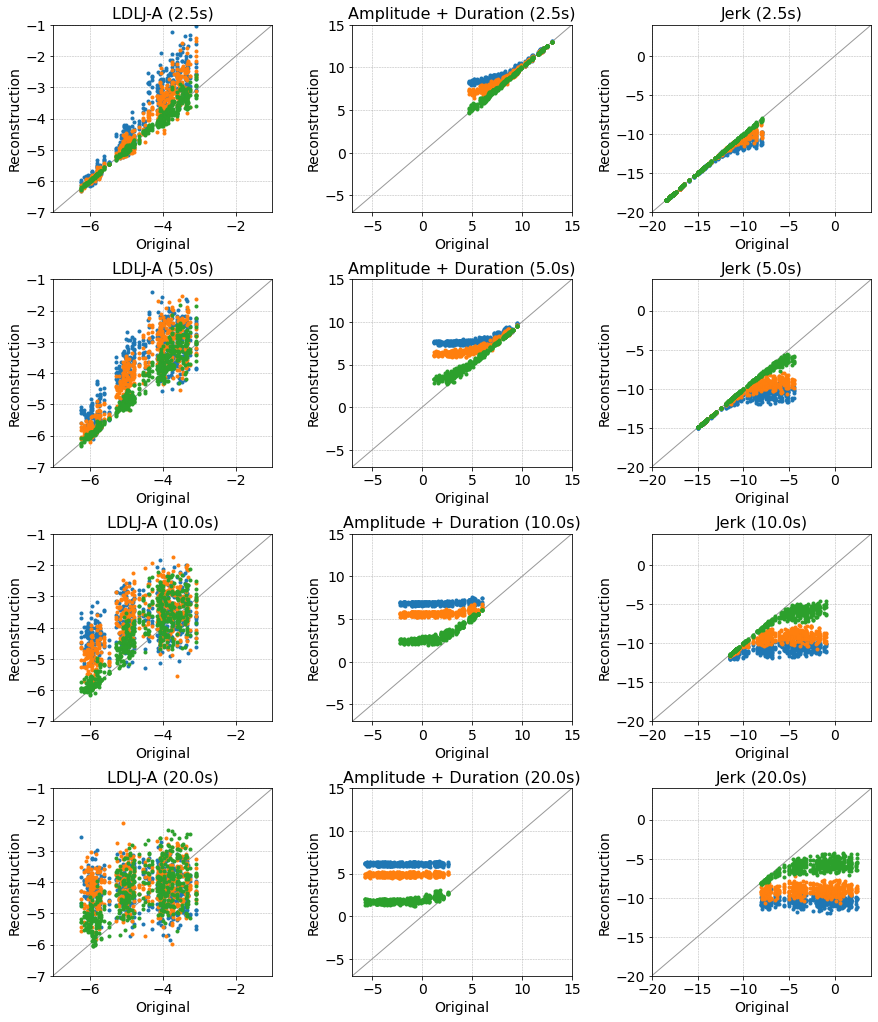

In [0]:
fig = ra.compare_ldlja_terms_different_durations(velRecon, ra.Params);
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-dur-phierr.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-dur-phierr.png", format="png", dpi=300)
# Comment the following line to see the figure.
# plt.close()

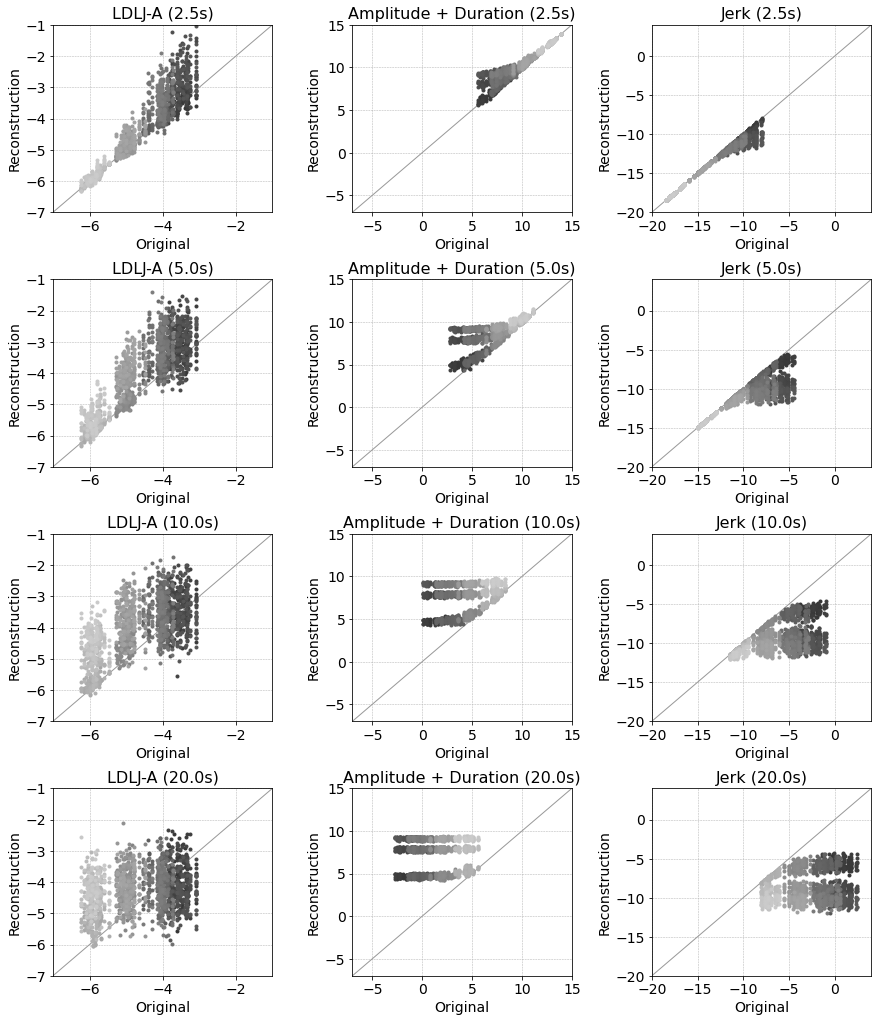

In [0]:
fig = ra.compare_ldlja_terms_different_durations2(velRecon, ra.Params);
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-diff-move.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-diff-move.png", format="png", dpi=300)
# Comment the following line to see the figure.
# plt.close()

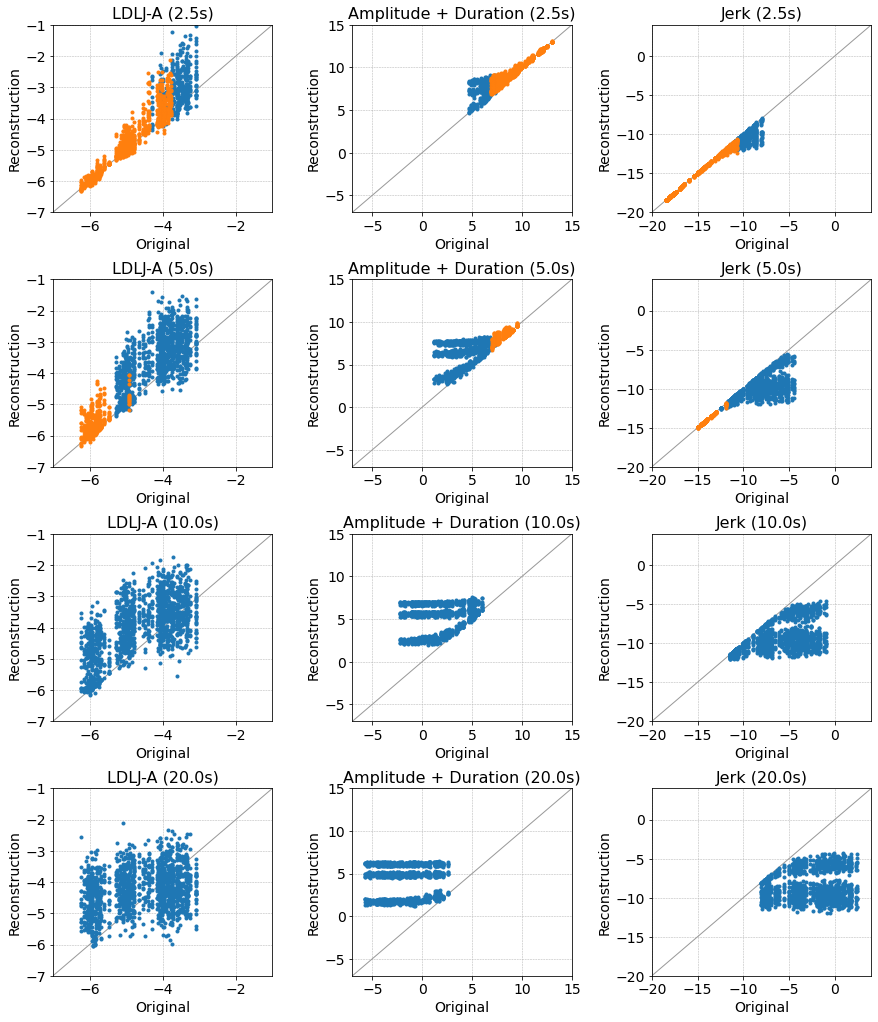

In [0]:
fig = ra.compare_ldlja_terms_different_durations_sgr(velRecon, ra.Params, sgrth=1.05);
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-sgr.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-terms-sgr.png", format="png", dpi=300)
# Comment the following line to see the figure.
# plt.close()

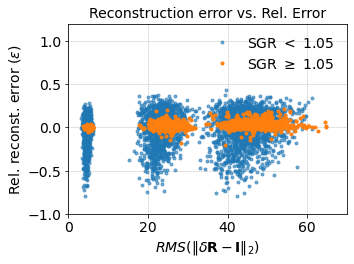

In [0]:
fig = ra.ldlja_smootherr_vs_reconerr(velRecon, sgrth=1.05, col1="ldlja", col2="ldljra-wom");
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-wom-relerr-reconerr.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldlja-wom-relerr-reconerr.png", format="png", dpi=300)

In [0]:
summ_fname = "{0}/smooth_perf_summary_for_alej.csv".format(ra.Params.outdir)
velRecon[['rnorm', 'sgr', 'ldlja', 'ldljra', 'ldljra-wom']].to_csv(path_or_buf=summ_fname, index=True, header=True)

## LDLJ-V applied for simulated velocities with different reconstruction errors.

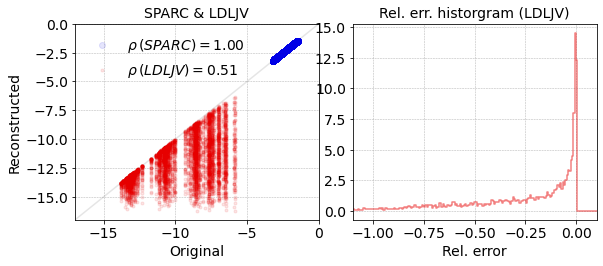

In [0]:
fig = ra.gen_summary_for_gyro(velRecon);
fig.savefig(fname="data/reconstructed/summary/gyro-summary.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/gyro-summary.png", format="png", dpi=300)

### Comparison of the different terms of the LDLJV measures for the simulated movements for different durations.

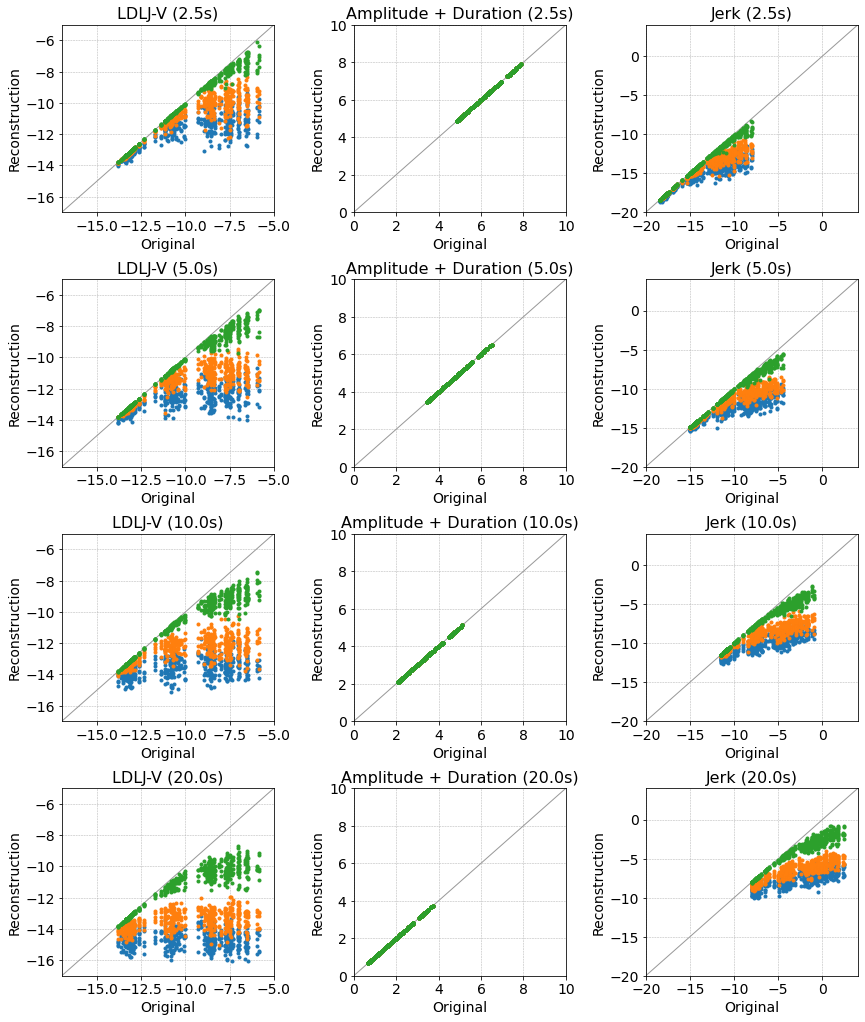

In [0]:
fig = ra.compare_ldljv_terms_dur_phierr(velRecon, ra.Params);
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldljv-terms-dur-phierr.svg", format="svg")
fig.savefig(fname="data/reconstructed/summary/ldlja-details/ldljv-terms-dur-phierr.png", format="png", dpi=300)
# Comment the following line to see the figure.
#plt.close()